In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [61]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [62]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [63]:
train_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

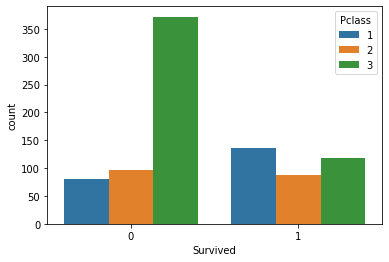

In [64]:
sns.countplot(x='Survived', hue='Pclass', data=train_data)

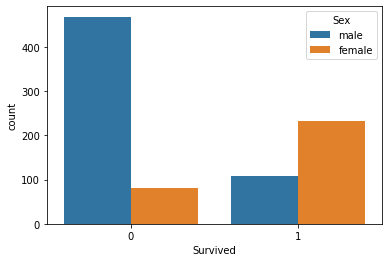

In [65]:
sns.countplot(x='Survived', hue='Sex', data=train_data)

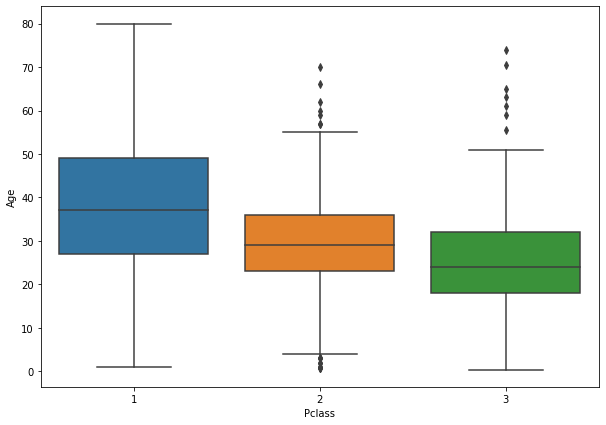

In [66]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=train_data)
plt.show()

In [67]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
train_data.drop("Cabin",inplace=True,axis=1)
test_data.drop("Cabin",inplace=True,axis=1)

In [69]:
train_data.dropna(inplace=True)
test_data.dropna(inplace = True)

**imputing Average age to null age value**

In [70]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean', verbose = 0)
imputer = imputer.fit(train_data.iloc[:,5:6])
train_data.iloc[:,5:6] = imputer.transform(train_data.iloc[:,5:6])
imputer1  = imputer.fit(test_data.iloc[:,4:5])
test_data.iloc[:,4:5] = imputer.transform(test_data.iloc[:,4:5])



**converting categorical data into numerical data**

In [71]:

train_data = pd.get_dummies(train_data, columns = ['Sex', 'Embarked'],drop_first = True)
test_data = pd.get_dummies(test_data, columns = ['Sex', 'Embarked'],drop_first = True)

In [72]:
train_data.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1


In [73]:
test_data.head(3)

,PassengerId,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",34.5,0,0,330911,7.8292,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,1,1,0


In [74]:
train_data = train_data.loc[:, ['Survived','Pclass','Age','Sex_male','Fare','Embarked_Q','Embarked_S']]
test_data = test_data.loc[:, ['Pclass','Sex_male','Age','Fare','Embarked_Q','Embarked_S']]

In [83]:
X_train = train_data.iloc[:,1:]
y_train = train_data.iloc[:,0:1]
X_test = test_data

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
885,0
886,0
887,1
889,1


In [84]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
y_pred = logmodel.predict(X_test)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [85]:
logmodel.score(X_train, y_train)

0.7963483146067416

In [78]:

gender = X_test['Sex_male']


In [79]:
genderName = []
for i in gender:
#     print(i)
    if(i == 1):
        genderName.append('Male')
    else:
        genderName.append('Female')

In [80]:
df = pd.DataFrame({'Gender1':genderName,'Survived':y_pred})

In [81]:
df.head()

,Gender1,Survived
0,Male,0
1,Female,0
2,Male,0
3,Male,0
4,Female,0


In [86]:
output_csv = df.to_csv('Assignment_Output.csv', index = False)